# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [131]:
import pandas as pd
import numpy as np

env = pd.read_csv('/Users/danielzarur2022/GitHub/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv')
species = pd.read_csv('/Users/danielzarur2022/GitHub/assignment-4/data/Arrigetch_Peaks_Species_Data.csv')
print(env.head(3))
print(species.head(3))
print("The dimmensions of env is:" , env.shape)
print("The dimmensions of species is:", species.shape)

env = env.replace(-9999, np.NaN)
species = species.replace(-9999, np.NaN)

print("The number of unique values in the Plant Community Name column:",env["PLANT_COMMUNITY_NAME"].nunique())

print(env.drop("TURBOVEG_PLOT_NUMBER", axis = 1).describe)

merged_df = pd.merge(env, species, on='TURBOVEG_PLOT_NUMBER')

missingRows = (merged_df.isnull().sum(axis=1))
print("Number of missing values in the merged dataframe:", (missingRows > 0).sum())

mostSpecies = merged_df["PLANT_COMMUNITY_NAME"].value_counts().idxmax()
print("The species present the most is:", mostSpecies)

totalsData = []
for row in species.drop('TURBOVEG_PLOT_NUMBER', axis=1).values:
    total = row.sum()
    totalsData.append(total)
species["totals"] = totalsData

print("In terms of inconsistencies between the description and the data, each species has its own column in the data but in the description the species csv is explained to only have 2 columns. To correct this, I would either create a new column for eaach species in the description, but even easier, make a new column of species and have each values run on the species row instead of uner it's column.")

   TURBOVEG_PLOT_NUMBER                            PLANT_COMMUNITY_NAME  \
0                 10925  Ass. Umbilicarietum pensylvanicae-carolinianae   
1                 10926  Ass. Umbilicarietum pensylvanicae-carolinianae   
2                 10927  Ass. Umbilicarietum pensylvanicae-carolinianae   

   ELEVATION  ASPECT  SLOPE  COVER_LITTER_LAYER  COVER_OPEN_WATER  COVER_ROCK  \
0       1090      45  -9999                   0                 0           0   
1        920     315  -9999                   0                 0           0   
2        940     270  -9999                   0                 0           0   

   COVER_CRUST  COVER_BARE_SOIL  \
0            0                0   
1            0                0   
2            0                0   

                                             REMARKS  
0  Crustose and foliose lichen dominated vegetati...  
1  Crustose and foliose lichen dominated vegetati...  
2  Crustose and foliose lichen dominated vegetati...  
   TURBOVEG_P

## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




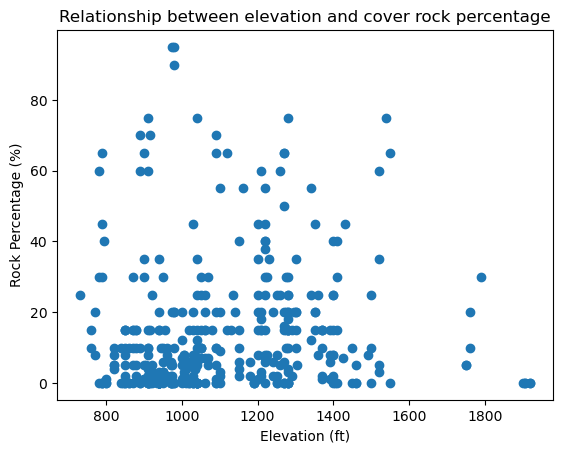

There is no relationship between elevation and cover rock percentage because as elevation increases, rock percentage does not increase or decrease
count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64


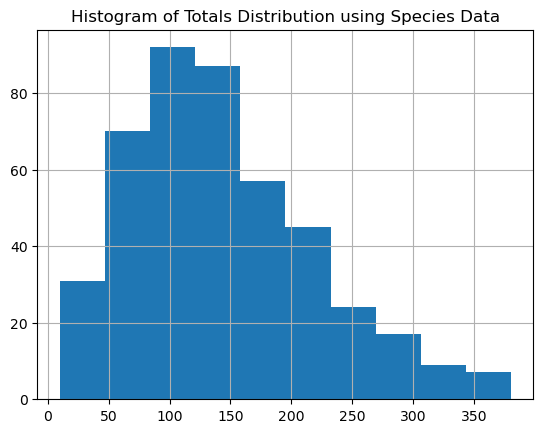

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

x = merged_df['ELEVATION']
y = merged_df['COVER_ROCK']
plt.scatter(x, y)
plt.xlabel('Elevation (ft)')
plt.ylabel('Rock Percentage (%)')
plt.title('Relationship between elevation and cover rock percentage')
plt.show()
print("There is no relationship between elevation and cover rock percentage because as elevation increases, rock percentage does not increase or decrease")

species["totals"].hist()
plt.title('Histogram of Totals Distribution - Species Data')
plt.show
print(species['totals'].describe())



<function matplotlib.pyplot.show(close=None, block=None)>

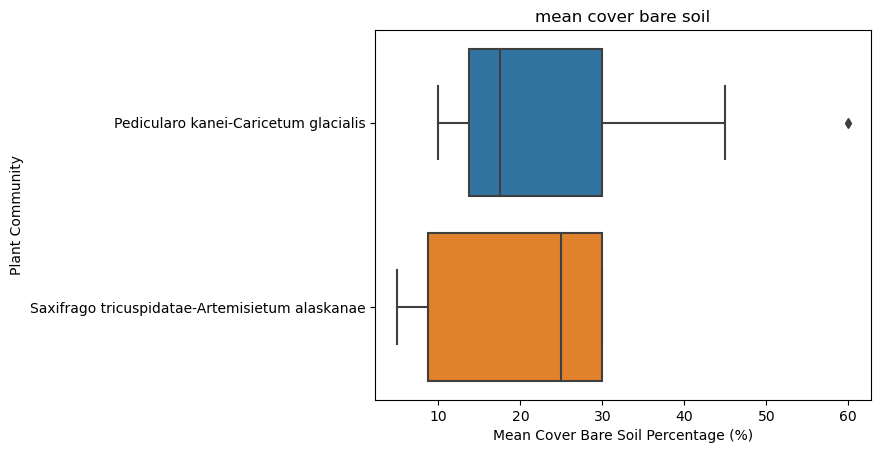

In [165]:
envsubset = env[(env.PLANT_COMMUNITY_NAME == 'Caricetum scirpoideaerupestris')|
                (env.PLANT_COMMUNITY_NAME=='Pedicularo kanei-Caricetum glacialis')|
                (env.PLANT_COMMUNITY_NAME=='Saxifrago tricuspidatae-Artemisietum alaskanae')]
sns.boxplot(data=envsubset, x="COVER_BARE_SOIL", y="PLANT_COMMUNITY_NAME")
plt.xlabel('Mean Cover Bare Soil Percentage (%)')
plt.ylabel('Plant Community')
plt.title("mean cover bare soil")
plt.show
